In [1]:
''' Import libraries '''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

''' Ignore Warnings '''
import warnings
warnings.filterwarnings('ignore')

In [2]:
''' Read the data from the CSV file '''
df = pd.read_csv('hw2_dataset.csv') # Read the data from the CSV file
print(f"Shape: {df.shape}\n\nSample:\n{df.head()}") # printing the shape and the first 5 rows

Shape: (1000, 3)

Sample:
         X1        X2  label
0  0.550311 -1.059195      1
1  0.185336 -1.080643      1
2 -0.457508 -0.057527      1
3 -0.092201  1.156747      0
4  0.837751 -1.020240      1


In [3]:
''' Separate X and y and split the data '''

X = df.drop('label',axis=1) # drop the label column and assign the remaining columns to X
y = df['label'] # assign the label column to y
print(f"Shapes X and y: {X.shape,y.shape}") # print the shapes of X and y

Shapes X and y: ((1000, 2), (1000,))


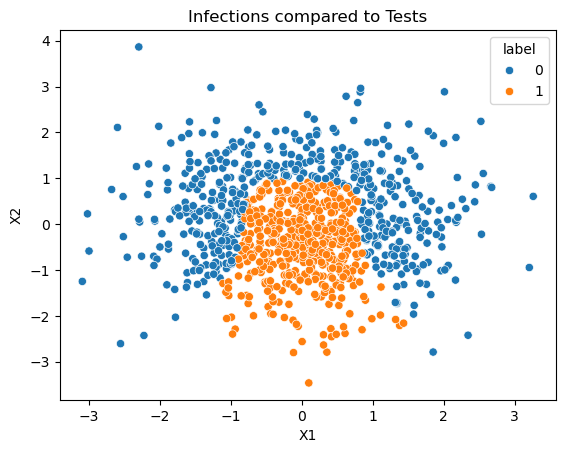

In [4]:
''' Visualize the dataset with a scatter plot and represent the 2 classes in 2 colors '''
sns.scatterplot(X,x=X['X1'],y=X['X2'],hue=y) # scatter plot of the data
plt.title('Infections compared to Tests') # giving the plot a title
plt.show() # shows us that there is a clear separation between the 2 classes

In [5]:
''' Check dataset for imbalance of classes'''
print(f"Check if dataset is balanced: {df.label.value_counts()}") # checking if the dataset is balanced

Check if dataset is balanced: label
1    501
0    499
Name: count, dtype: int64


__Clearly the dataset is balanced to start with - An almost equal amount of 1s and 0s.__

That means, if I can predict both 1s and 0s correctly, my accuracy will be the highest for the given dataset and the given algorithm.

In [6]:
''' Split the data into training and testing sets (test_size=0.20, random_state=0) '''
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0)
print(X_train.shape,X_test.shape, type(X_train)) # number of training and testing samples
print(f"\n1s and 0s in test set:\n{y_test.value_counts()}") # Display the count of 1s and 0s in the test set

(800, 2) (200, 2) <class 'pandas.core.frame.DataFrame'>

1s and 0s in test set:
label
1    110
0     90
Name: count, dtype: int64


In [7]:
''' Create a logreg model and fit it to the training data '''

logreg = LogisticRegression() # create a logistic regression model
logreg.fit(X_train,y_train) # fit the model to the training data

train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)

print(f"Train predictions:\n{train_pred[:150]}\n\nTest predictions:\n{test_pred}")

Train predictions:
[0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0
 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0
 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1
 0 1]

Test predictions:
[1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1
 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0
 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0]


In [8]:
''' Compute the model's accuracy on the training and test data '''
accuracy_train = accuracy_score(y_train, train_pred)*100 # calculating the accuracy of the model
accuracy_test = accuracy_score(y_test, test_pred)*100 # calculating the accuracy of the model

print(f"Accuracy of our training data: {accuracy_train}%") # printing the accuracy
print(f"Accuracy of our test data: {accuracy_test}%") # printing the accuracy

Accuracy of our training data: 68.0%
Accuracy of our test data: 61.5%


Confusion Matrix: 
[[52 38]
 [39 71]]



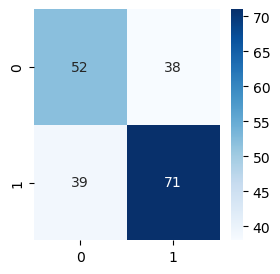

In [9]:
''' Print the confusion matrix for the test data '''
cm = confusion_matrix(y_test, test_pred) # Assign it to a variable
print(f"Confusion Matrix: \n{cm}\n") # Printing the confusion matrix

plt.figure(figsize=(3,3)) # setting the size of the plot
sns.heatmap(cm, annot=True, cmap='Blues') # creating the heatmap
plt.show() # showing the heatmap
# Top-left: True Positives
# Top-right: False Positives
# Bottom-left: False Negatives
# Bottom-right: True Negatives

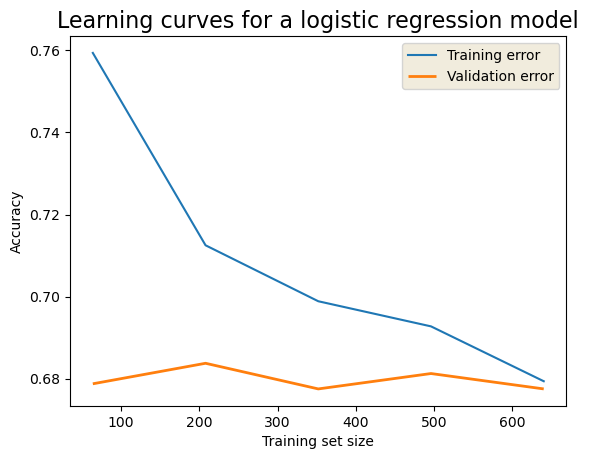

In [10]:
'''Plot learning curves'''
train_sizes, train_scores, valid_scores = learning_curve(logreg, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.style.use('Solarize_Light2') # Use the Solarize_Light2 style
plt.plot(train_sizes, valid_scores_mean, label='Validation error')
plt.title('Learning curves for a logistic regression model')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### What can you infer about your model's performance? Is it underfitting, overfitting, or performing well? ####

The two curves have converged. This means that bias is high and variance is low. This tells us that adding any more data will not improve accuracy. We either need to do some feature engineering or add a new measurement to the dataset. Since the plot shows an oval shape, we need a polynomial decision boundary.



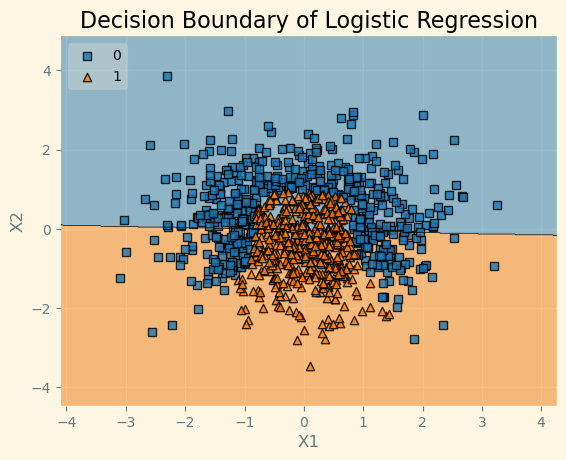

In [11]:
''' Plot the decision boundary for the logistic regression model using the mlxtend library'''
X = np.array(X) # Convert the features to an array
y = np.array(y) # Convert the labels to an array

plot_decision_regions(X, y, clf=logreg, legend=2) # The function expects features(X), labels(y), model used, as inputs.
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary of Logistic Regression')
plt.show()

#### Why do you think the model has the kind of fit you decided in point 5? ####

I believe the model is underfitting as described in point 5 becuause the bias (blue) is much higher than the variance (orange).

#### What would you have to do if you were forced to use teh logistic regression model and had to get a better accuracy? ####
If I were forced to use the logistic regression model, I would use feature engineering to make the features polynomial with a degree of 2.

In [12]:
''' Define a paramter grid'''
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30]
}

In [13]:
''' Use a RandomForest Classifier '''
rf = RandomForestClassifier(random_state=0) # Create a Random Forest classifier
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=5) # Create a GridSearchCV object
grid_search.fit(X_train, y_train) # Fit the model to the training data

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [10, 50, 100]})

In [14]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Fit the RandomForest classifier with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Extract feature importances
importances = best_rf.feature_importances_
print(f"Feature Importances:\n{importances}")

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Define the categorical feature names
feature_names = ['X1', 'X2']

# Create list of feature names in ascending order
names = []

for i in sorted_indices: # Loop through the sorted indices
    names.append(feature_names[i]) # Append the feature names to the list

print(f"\nFeature names sorted by importance:\n{names}")

Best parameters: {'max_depth': None, 'n_estimators': 100}
Feature Importances:
[0.64671555 0.35328445]

Feature names sorted by importance:
['X1', 'X2']


In [15]:
r_pred = grid_search.predict(X_test) # Predict the test data
print(f"Accuracy: {accuracy_score(r_pred,y_test)*100}%\n\n Confusion Matrix\n{confusion_matrix(r_pred,y_test)}") # Print the accuracy and confusion matrix

Accuracy: 98.5%

 Confusion Matrix
[[ 90   3]
 [  0 107]]


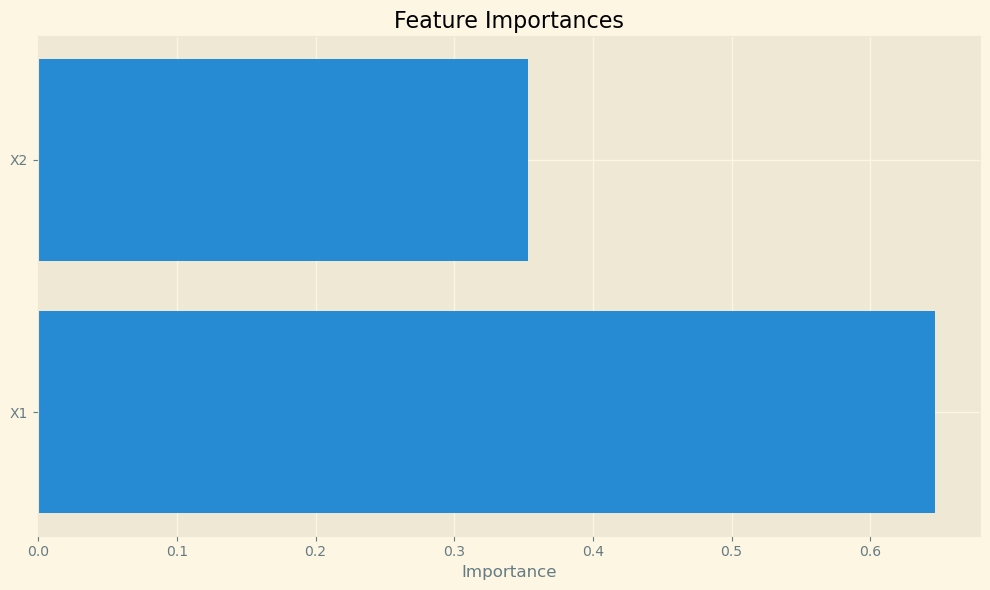

In [16]:
# Create a horizontal bar chart for feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(importances)), importances[sorted_indices], align='center')
plt.yticks(range(len(importances)), names)
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

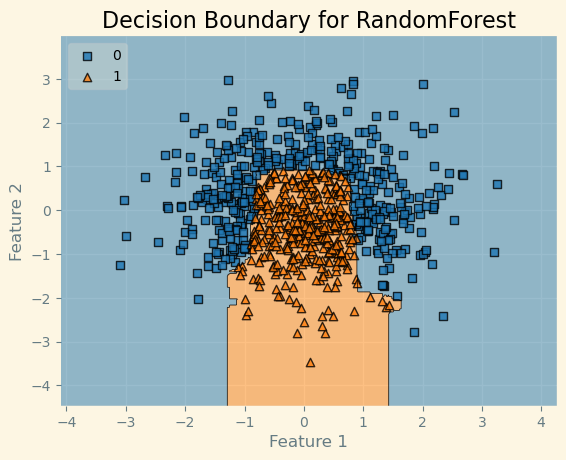

In [17]:
# Change to Numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Plot the decision boundary
plot_decision_regions(X_train, y_train, clf=best_rf, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for RandomForest')
plt.show()

In [19]:
'''Define the parameter grid '''
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

In [20]:

# Create a SVM classifier
svc = SVC() # Create a Support Vector Classifier

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid, 
                           cv=5) # Create a GridSearchCV object
grid_search.fit(X_train, y_train) # Fit the model to the training data

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'C': 10, 'kernel': 'rbf'}


In [24]:
# Predict the target on the test dataset
s_pred = grid_search.predict(X_test)

# Evaluate the model on the training data
print(f"Best cross-validation score: {grid_search.best_score_ * 100:.2f}%")

# Calculate the accuracy score on the test dataset
test_accuracy = accuracy_score(y_test, s_pred)
print(f"Test set accuracy score: {test_accuracy * 100:.2f}%")

# Plot the confusion matrix
cm_svc= confusion_matrix(y_test, test_pred) # Assign it to a variable
print(f"Confusion Matrix: \n{cm}\n") # Printing the confusion matrix

Best cross-validation score: 98.12%
Test set accuracy score: 96.50%
Confusion Matrix: 
[[52 38]
 [39 71]]



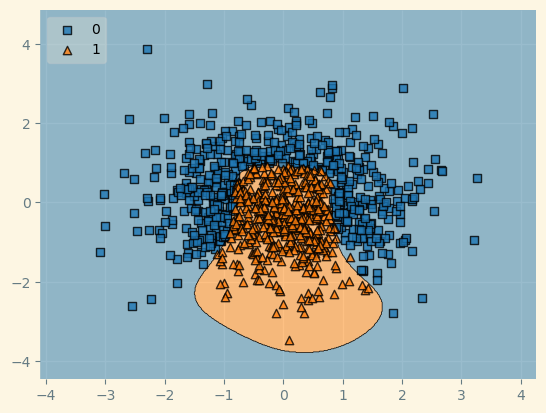

In [23]:
'''Decision boundary'''
plot_decision_regions(np.array(X), np.array(y), clf=grid_search, legend=2)
plt.show()

In [25]:
''' Create a seperate SVC model with C=0.0001 and kernel='rbf'''

# Split the data into training and test sets (assuming X and y are already defined)
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVC model with C=0.0001 and kernel='rbf'
svc_new = SVC(C=0.0001, kernel='rbf', random_state=42)

# Fit the model to the training data
svc_new.fit(X_train_svc, y_train_svc)

# Predict the target on the test dataset
y_pred_svc_new = svc_new.predict(X_test_svc)

In [26]:
# Calculate the accuracy score on the test dataset
test_accuracy_svc_new = accuracy_score(y_test_svc, y_pred_svc_new)
print(f"Test set accuracy score with C=0.0001 and kernel='rbf': {test_accuracy_svc_new * 100:.2f}%")

Test set accuracy score with C=0.0001 and kernel='rbf': 45.00%


## Questions:

1. How would the learning curves, decision boundaries and confusion matrices help you in
evaluating a model's performance?
Ans) Decision boundaries and confusion matricies will help in evaluating a model's performance by getting a vizualization of the model's accuracy which could lead us in a better direction than just the performance metrics. Learning curves would then help us find the underlying reason for why the accuracy is the way it is (overffiting or underfitting)

2. What is the accuracy of the model for the separate SVC model you created in point 11?
What is the reason for that?
Ans) The accuracy of the seperate SVC model is 45%, which is way lower than the 96%. The choice of the hyperparameter C=0.0001, which made the model construct a smooether decision boundary with high regularization at the cost of more missclassifications on the training data, which led to massive underfitting as data was not accounted by the decision boundary line of best fit.